In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Importing Data

In [15]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

### K-Means Clustering

Using the elbow method, a suitable choice for K will be made

In [16]:
inertias = []
cluster_limit = 10

for i in range(1, cluster_limit+1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(california_housing.data)
    inertias.append(kmeans.inertia_)

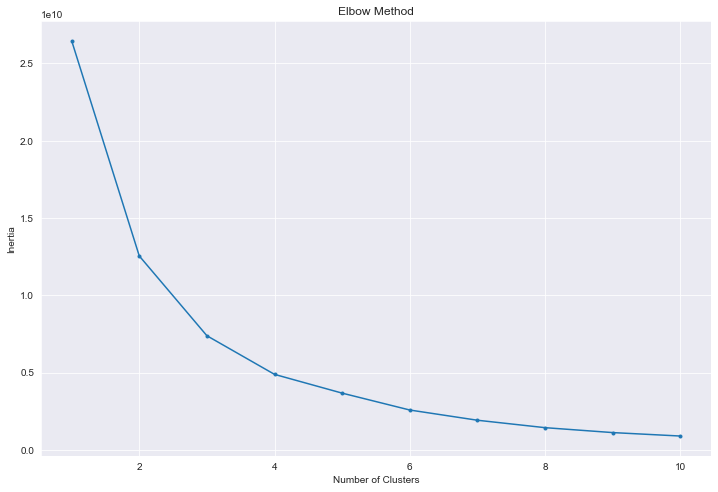

In [17]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, cluster_limit+1), inertias, marker = ".")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The suitable choice will be <b> K = 3 </b>

### Plotting the clusters

The normalised L2 norm of the input features are plotted against the target feature

In [34]:
kmeans_final = KMeans(n_clusters = 3)
kmeans_final.fit(california_housing.data)

KMeans(n_clusters=3)

In [35]:
input_norm = np.sum(california_housing.data ** 2, axis = 1) ** 0.5
input_norm_std = (input_norm - input_norm.mean()) / input_norm.std()

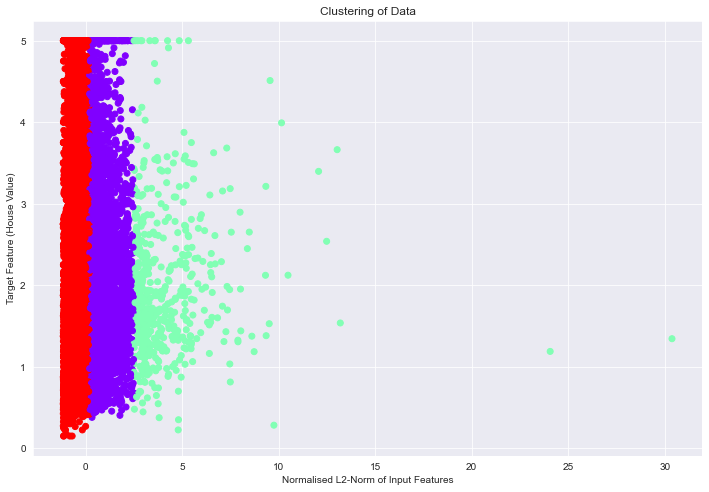

In [36]:
plt.figure(figsize = (12, 8))
plt.scatter(input_norm_std, california_housing.target, c = kmeans_final.labels_, cmap = 'rainbow')
plt.title('Clustering of Data')
plt.ylabel('Target Feature (House Value)')
plt.xlabel('Normalised L2-Norm of Input Features')
plt.show()

We can observe that 3 distinct clusters are formed

### Gaussian Mixture Model

In [37]:
from sklearn.mixture import GaussianMixture

In [39]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(california_housing.data)

GaussianMixture(n_components=3)

In [42]:
labels = gmm.predict(california_housing.data)

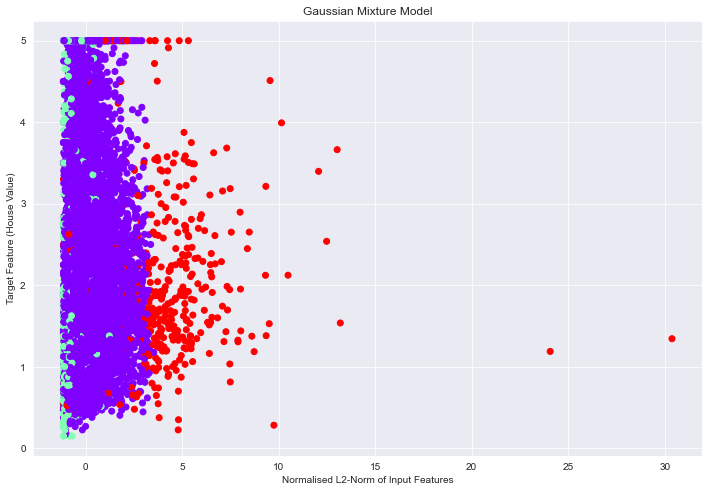

In [43]:
plt.figure(figsize = (12, 8))
plt.scatter(input_norm_std, california_housing.target, c = labels, cmap = 'rainbow')
plt.title('Gaussian Mixture Model')
plt.ylabel('Target Feature (House Value)')
plt.xlabel('Normalised L2-Norm of Input Features')
plt.show()